In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
df = pd.read_csv('../DB/1H/BTCUSDT_1H.csv', parse_dates=True) 

# df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
# # # Convert 'date' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])  # Assuming the 'date' is in milliseconds

# # # Set 'date' as index
df.set_index('datetime', inplace=True)

# df.iloc[0]
# df.dtypes
# df.head()
df.drop(['volume', 'quote_volume'], axis=1, inplace=True)
btc_data = df[:].copy()
btc_data


,open,high,low,close
datetime,,,,
2019-12-31 23:00:01.664,7201.47,7205.87,7185.80,7195.87
2019-12-31 23:59:00.608,7195.87,7195.87,7175.94,7177.07
2020-01-01 01:00:10.624,7177.07,7228.33,7176.88,7214.96
2020-01-01 01:59:09.568,7214.96,7243.69,7212.43,7242.71
2020-01-01 03:00:19.584,7242.71,7243.02,7220.60,7224.34
...,...,...,...,...
2025-01-07 02:00:32.512,101879.10,101977.10,101604.40,101628.70
2025-01-07 02:59:31.456,101628.70,101784.90,101488.80,101663.60
2025-01-07 04:00:41.472,101663.60,101891.40,101614.30,101614.30


In [61]:
# Calculate the log price
btc_data['logPrice'] = np.log(btc_data['close'])

# Calculate log returns
btc_data['logReturn'] = btc_data['logPrice'].diff().dropna()

btc_data

,open,high,low,close,logPrice,logReturn
datetime,,,,,,
2019-12-31 23:00:01.664,7201.47,7205.87,7185.80,7195.87,8.881263,NaN
2019-12-31 23:59:00.608,7195.87,7195.87,7175.94,7177.07,8.878647,-0.002616
2020-01-01 01:00:10.624,7177.07,7228.33,7176.88,7214.96,8.883912,0.005265
2020-01-01 01:59:09.568,7214.96,7243.69,7212.43,7242.71,8.887751,0.003839
2020-01-01 03:00:19.584,7242.71,7243.02,7220.60,7224.34,8.885211,-0.002540
...,...,...,...,...,...,...
2025-01-07 02:00:32.512,101879.10,101977.10,101604.40,101628.70,11.529081,-0.002461
2025-01-07 02:59:31.456,101628.70,101784.90,101488.80,101663.60,11.529425,0.000343
2025-01-07 04:00:41.472,101663.60,101891.40,101614.30,101614.30,11.528940,-0.000485


In [62]:
# print(btc_data['logReturn'].isnull().sum())  # Check for NaN values
# print(btc_data['logReturn'].isinf().sum()) 
# btc_data = btc_data.dropna(subset=['logReturn'])
btc_data['logReturn'].fillna(method='bfill', inplace=True)
btc_data

C:\Users\idf-v\AppData\Local\Temp\ipykernel_93592\2792414634.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc_data['logReturn'].fillna(method='bfill', inplace=True)


,open,high,low,close,logPrice,logReturn
datetime,,,,,,
2019-12-31 23:00:01.664,7201.47,7205.87,7185.80,7195.87,8.881263,-0.002616
2019-12-31 23:59:00.608,7195.87,7195.87,7175.94,7177.07,8.878647,-0.002616
2020-01-01 01:00:10.624,7177.07,7228.33,7176.88,7214.96,8.883912,0.005265
2020-01-01 01:59:09.568,7214.96,7243.69,7212.43,7242.71,8.887751,0.003839
2020-01-01 03:00:19.584,7242.71,7243.02,7220.60,7224.34,8.885211,-0.002540
...,...,...,...,...,...,...
2025-01-07 02:00:32.512,101879.10,101977.10,101604.40,101628.70,11.529081,-0.002461
2025-01-07 02:59:31.456,101628.70,101784.90,101488.80,101663.60,11.529425,0.000343
2025-01-07 04:00:41.472,101663.60,101891.40,101614.30,101614.30,11.528940,-0.000485


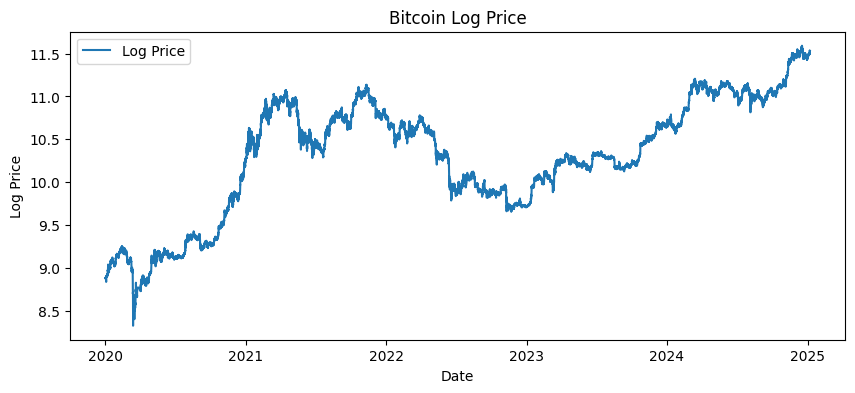

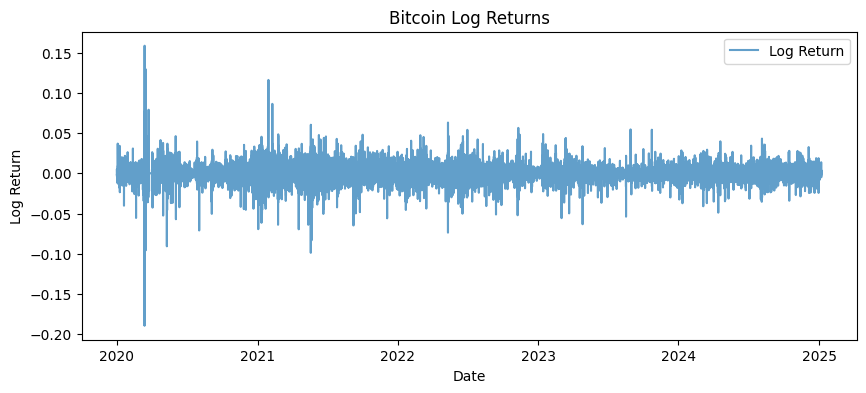

In [63]:
# Plot the log price
plt.figure(figsize=(10, 4))
plt.plot(btc_data['logPrice'], label='Log Price')
plt.title('Bitcoin Log Price')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.show()

# Plot the log returns
plt.figure(figsize=(10, 4))
plt.plot(btc_data['logReturn'], label='Log Return', alpha=0.7)
plt.title('Bitcoin Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()


In [64]:
# Perform ADF test on log returns
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result

adf_result = adf_test(btc_data['logReturn'])  # Correct column name here
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -29.19252528303003
p-value: 0.0
Critical Values: {'1%': -3.4304988083828523, '5%': -2.86160577004947, '10%': -2.5668050072568755}


In [65]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44000 entries, 2019-12-31 23:00:01.664000 to 2025-01-07 06:00:50.432000
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       44000 non-null  float64
 1   high       44000 non-null  float64
 2   low        44000 non-null  float64
 3   close      44000 non-null  float64
 4   logPrice   44000 non-null  float64
 5   logReturn  44000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


In [66]:
# Lag Features
btc_data.loc[:, 'logReturn_lag1'] = btc_data['logReturn'].shift(1)
btc_data.loc[:, 'logReturn_lag2'] = btc_data['logReturn'].shift(2)  # Lag by 2 days

# Rolling Statistics
window_size = 10
btc_data.loc[:, 'rolling_mean'] = btc_data['logReturn'].rolling(window=window_size).mean()
btc_data.loc[:, 'rolling_std'] = btc_data['logReturn'].rolling(window=window_size).std()

window_size_30 = 30
btc_data.loc[:, 'rolling_mean_30'] = btc_data['logReturn'].rolling(window=window_size_30).mean()
btc_data.loc[:, 'rolling_std_30'] = btc_data['logReturn'].rolling(window=window_size_30).std()

# Exponential Moving Averages (EMAs)
ema_short = 12
ema_long = 26
btc_data.loc[:, 'ema_short'] = btc_data['logReturn'].ewm(span=ema_short, adjust=False).mean()
btc_data.loc[:, 'ema_long'] = btc_data['logReturn'].ewm(span=ema_long, adjust=False).mean()

# Volatility Features
window_volatility = 30
btc_data.loc[:, 'volatility_30'] = btc_data['logReturn'].rolling(window=window_volatility).std()
btc_data.loc[:, 'volatility_60'] = btc_data['logReturn'].rolling(window=window_volatility*2).std()

# Trend Features
btc_data.loc[:, 'trend_5'] = btc_data['close'].rolling(window=5).mean()
btc_data.loc[:, 'trend_10'] = btc_data['close'].rolling(window=10).mean()
btc_data.loc[:, 'trend_30'] = btc_data['close'].rolling(window=30).mean()

# Momentum Feature
btc_data.loc[:, 'momentum'] = btc_data['logReturn'].diff(1)  # Difference of log returns (momentum)

btc_data

,open,high,low,close,logPrice,logReturn,logReturn_lag1,logReturn_lag2,rolling_mean,rolling_std,rolling_mean_30,rolling_std_30,ema_short,ema_long,volatility_30,volatility_60,trend_5,trend_10,trend_30,momentum
datetime,,,,,,,,,,,,,,,,,,,,
2019-12-31 23:00:01.664,7201.47,7205.87,7185.80,7195.87,8.881263,-0.002616,NaN,NaN,NaN,NaN,NaN,NaN,-0.002616,-0.002616,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:59:00.608,7195.87,7195.87,7175.94,7177.07,8.878647,-0.002616,-0.002616,NaN,NaN,NaN,NaN,NaN,-0.002616,-0.002616,NaN,NaN,NaN,NaN,NaN,0.000000
2020-01-01 01:00:10.624,7177.07,7228.33,7176.88,7214.96,8.883912,0.005265,-0.002616,-0.002616,NaN,NaN,NaN,NaN,-0.001403,-0.002032,NaN,NaN,NaN,NaN,NaN,0.007881
2020-01-01 01:59:09.568,7214.96,7243.69,7212.43,7242.71,8.887751,0.003839,0.005265,-0.002616,NaN,NaN,NaN,NaN,-0.000597,-0.001597,NaN,NaN,NaN,NaN,NaN,-0.001427
2020-01-01 03:00:19.584,7242.71,7243.02,7220.60,7224.34,8.885211,-0.002540,0.003839,0.005265,NaN,NaN,NaN,NaN,-0.000896,-0.001667,NaN,NaN,7210.99,NaN,NaN,-0.006378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-07 02:00:32.512,101879.10,101977.10,101604.40,101628.70,11.529081,-0.002461,-0.001212,-0.001853,-0.000485,0.002866,0.001127,0.004215,0.000183,0.000743,0.004215,0.003322,101934.42,101858.59,100197.323333,-0.001248
2025-01-07 02:59:31.456,101628.70,101784.90,101488.80,101663.60,11.529425,0.000343,-0.002461,-0.001212,-0.000124,0.002698,0.001065,0.004212,0.000207,0.000713,0.004212,0.003273,101873.20,101845.99,100303.843333,0.002804
2025-01-07 04:00:41.472,101663.60,101891.40,101614.30,101614.30,11.528940,-0.000485,0.000343,-0.002461,-0.000090,0.002691,0.000980,0.004217,0.000101,0.000625,0.004217,0.003276,101757.68,101836.84,100401.933333,-0.000828


In [67]:
# # btcdata = btc_data.dropna()
btc_data.info()
btc_data = btc_data[60:]
# btc_data.info()

btc_data.ffill()  # backward fill

btc_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44000 entries, 2019-12-31 23:00:01.664000 to 2025-01-07 06:00:50.432000
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             44000 non-null  float64
 1   high             44000 non-null  float64
 2   low              44000 non-null  float64
 3   close            44000 non-null  float64
 4   logPrice         44000 non-null  float64
 5   logReturn        44000 non-null  float64
 6   logReturn_lag1   43999 non-null  float64
 7   logReturn_lag2   43998 non-null  float64
 8   rolling_mean     43991 non-null  float64
 9   rolling_std      43991 non-null  float64
 10  rolling_mean_30  43971 non-null  float64
 11  rolling_std_30   43971 non-null  float64
 12  ema_short        44000 non-null  float64
 13  ema_long         44000 non-null  float64
 14  volatility_30    43971 non-null  float64
 15  volatility_60    43941 non-null  float64
 16  trend_5  

,open,high,low,close,logPrice,logReturn,logReturn_lag1,logReturn_lag2,rolling_mean,rolling_std,rolling_mean_30,rolling_std_30,ema_short,ema_long,volatility_30,volatility_60,trend_5,trend_10,trend_30,momentum
datetime,,,,,,,,,,,,,,,,,,,,
2020-01-03 11:00:08.320,7313.11,7343.63,7306.85,7337.55,8.900760,0.003336,-0.004932,0.012998,0.006296,0.012128,0.000913,0.008585,0.003442,0.002100,0.008585,0.006293,7291.444,7199.834,7102.779333,0.008269
2020-01-03 11:59:07.264,7337.55,7347.28,7306.66,7321.45,8.898564,-0.002197,0.003336,-0.004932,0.005104,0.012338,0.000861,0.008599,0.002575,0.001782,0.008599,0.006290,7315.148,7236.265,7109.004333,-0.005533
2020-01-03 13:00:17.280,7321.45,7374.82,7310.38,7346.48,8.901977,0.003413,-0.002197,0.003336,0.005541,0.012175,0.001081,0.008576,0.002704,0.001903,0.008576,0.006270,7333.572,7275.868,7116.818000,0.005609
2020-01-03 13:59:16.224,7346.48,7358.48,7238.17,7252.88,8.889154,-0.012823,0.003413,-0.002197,0.000570,0.007005,0.000468,0.008896,0.000315,0.000812,0.008896,0.006476,7314.294,7279.993,7120.192000,-0.016236
2020-01-03 15:00:26.240,7252.88,7320.57,7252.87,7319.08,8.898240,0.009086,-0.012823,0.003413,0.001353,0.007509,0.000727,0.009034,0.001664,0.001425,0.009034,0.006571,7315.488,7289.832,7125.456000,0.021909


<Axes: title={'center': 'BTCUSDT Price Trends'}, xlabel='datetime'>

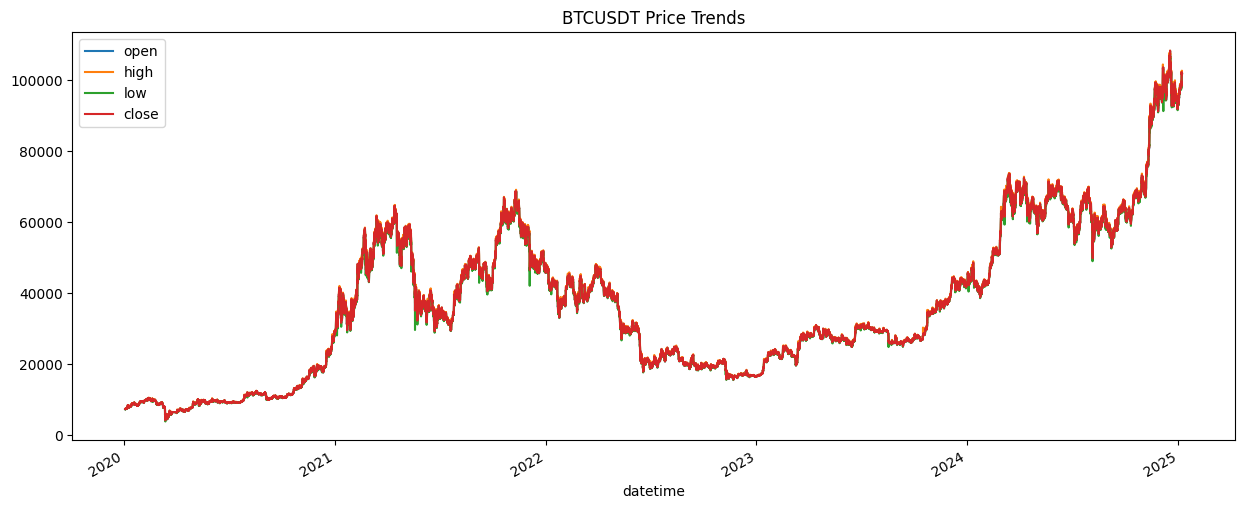

In [68]:
btc_data.describe()

btc_data[['open', 'high', 'low', 'close']].plot(figsize=(15, 6), title='BTCUSDT Price Trends')



<Axes: title={'center': 'Log Returns'}, xlabel='datetime'>

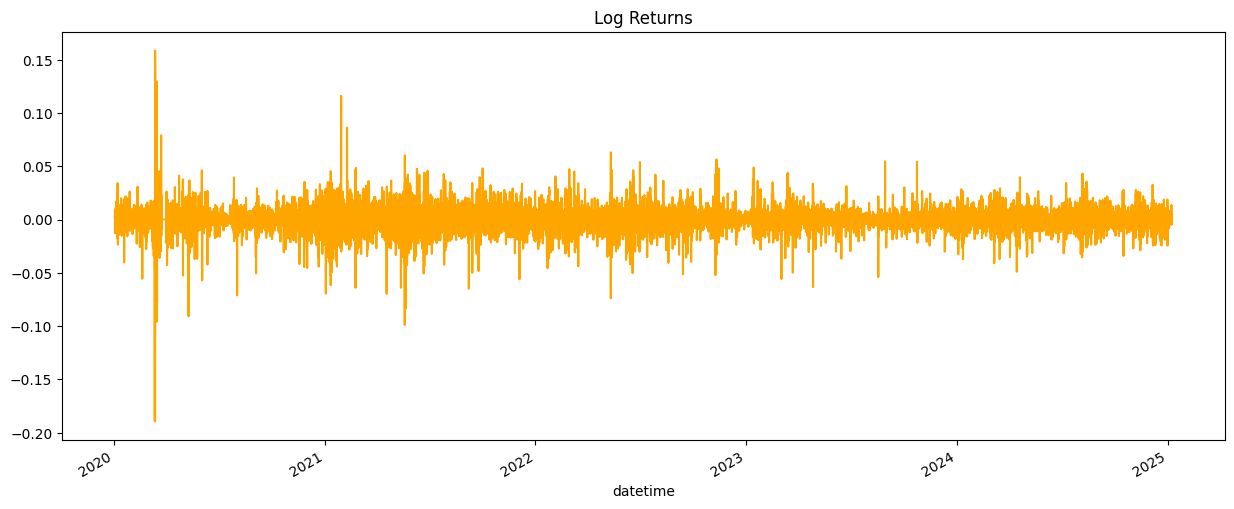

In [69]:
btc_data['logReturn'].plot(figsize=(15, 6), title='Log Returns', color='orange')

<Axes: >

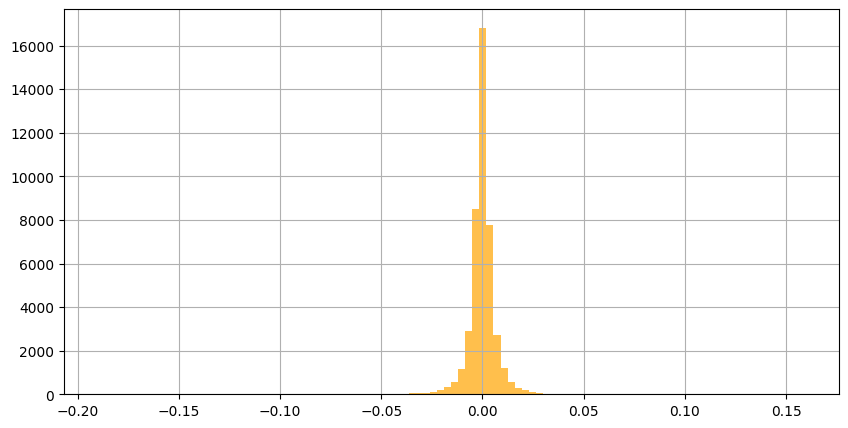

In [70]:
btc_data['logReturn'].hist(bins=100, figsize=(10, 5), color='orange', alpha=0.7)

<Axes: title={'center': 'Volatility Over Time'}, xlabel='datetime'>

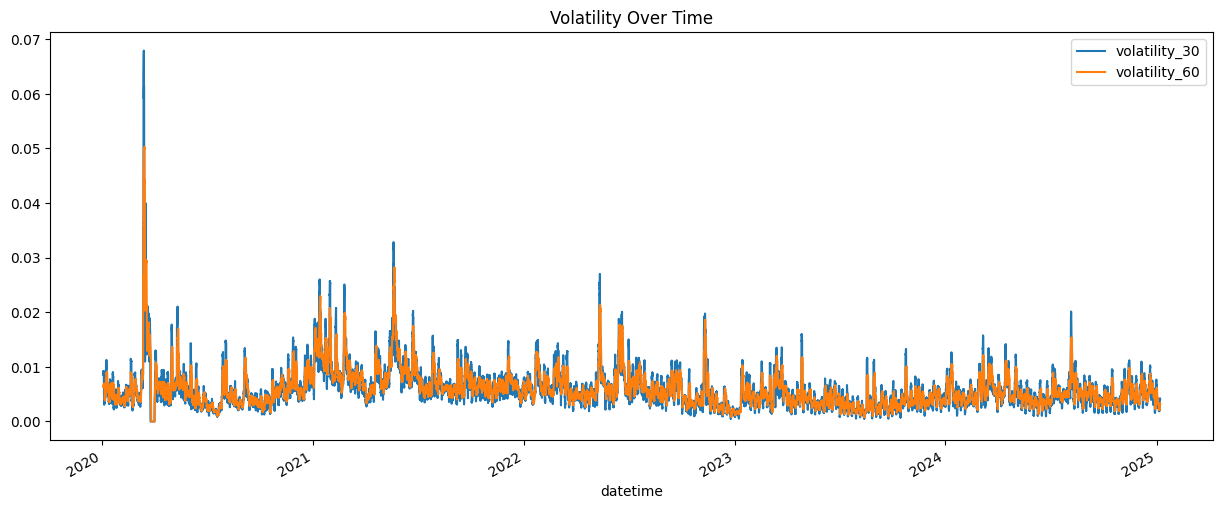

In [71]:
btc_data[['volatility_30', 'volatility_60']].plot(figsize=(15, 6), title='Volatility Over Time')


<Axes: title={'center': 'Trends Over Time'}, xlabel='datetime'>

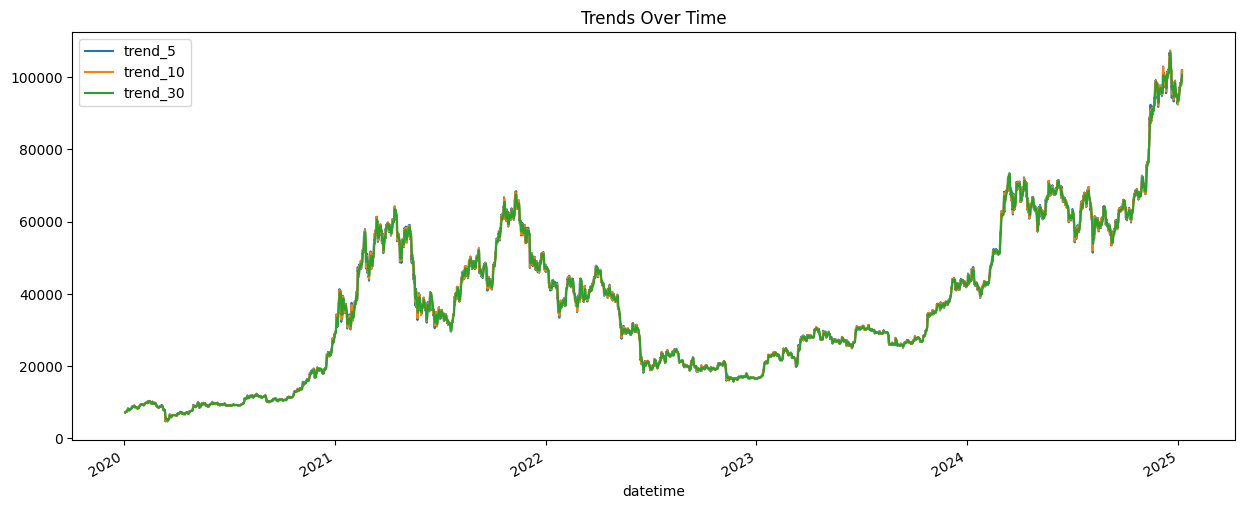

In [72]:
btc_data[['trend_5', 'trend_10', 'trend_30']].plot(figsize=(15, 6), title='Trends Over Time')


In [73]:
btc_data.corr()


,open,high,low,close,logPrice,logReturn,logReturn_lag1,logReturn_lag2,rolling_mean,rolling_std,rolling_mean_30,rolling_std_30,ema_short,ema_long,volatility_30,volatility_60,trend_5,trend_10,trend_30,momentum
open,1.000000,0.999954,0.999935,0.999918,0.939561,-0.005758,0.005254,0.005110,0.012489,0.015536,0.024813,0.010810,0.011688,0.021113,0.010810,0.003787,0.999951,0.999837,0.999321,-0.007717
high,0.999954,1.000000,0.999900,0.999955,0.939773,-0.000162,0.005152,0.004850,0.013959,0.018948,0.025207,0.013897,0.014360,0.022723,0.013897,0.006520,0.999924,0.999807,0.999303,-0.003724
low,0.999935,0.999900,1.000000,0.999948,0.939374,0.000629,0.006198,0.005515,0.015617,0.011680,0.026938,0.007432,0.016301,0.024791,0.007432,0.000775,0.999892,0.999756,0.999205,-0.003903
close,0.999918,0.999955,0.999948,1.000000,0.939601,0.005235,0.005175,0.004970,0.016021,0.015554,0.026759,0.010860,0.017602,0.025292,0.010860,0.003788,0.999903,0.999775,0.999248,0.000043
logPrice,0.939561,0.939773,0.939374,0.939601,1.000000,0.004010,0.003854,0.003621,0.011418,0.018683,0.019568,0.012024,0.012795,0.018428,0.012024,0.001279,0.939582,0.939551,0.939402,0.000109
logReturn,-0.005758,-0.000162,0.000629,0.005235,0.004010,1.000000,-0.017982,-0.013520,0.311504,-0.003419,0.177499,-0.001663,0.533106,0.377812,-0.001663,-0.004087,-0.003464,-0.004415,-0.005183,0.713434
logReturn_lag1,0.005254,0.005152,0.006198,0.005175,0.003854,-0.017982,1.000000,-0.018012,0.305002,-0.009908,0.172080,-0.003837,0.441205,0.342812,-0.003837,-0.005914,-0.001303,-0.003340,-0.004825,-0.713438
logReturn_lag2,0.005110,0.004850,0.005515,0.004970,0.003621,-0.013520,-0.018012,1.000000,0.301739,-0.014872,0.167906,-0.005576,0.365964,0.312206,-0.005576,-0.007192,0.000745,-0.002367,-0.004556,0.003148
rolling_mean,0.012489,0.013959,0.015617,0.016021,0.011418,0.311504,0.305002,0.301739,1.000000,-0.100833,0.570625,-0.032874,0.883184,0.862574,-0.032874,-0.030831,0.009053,0.000554,-0.012321,0.004556
rolling_std,0.015536,0.018948,0.011680,0.015554,0.018683,-0.003419,-0.009908,-0.014872,-0.100833,1.000000,-0.177256,0.824496,-0.089684,-0.148324,0.824496,0.710401,0.015666,0.016180,0.019368,0.004548


<Axes: >

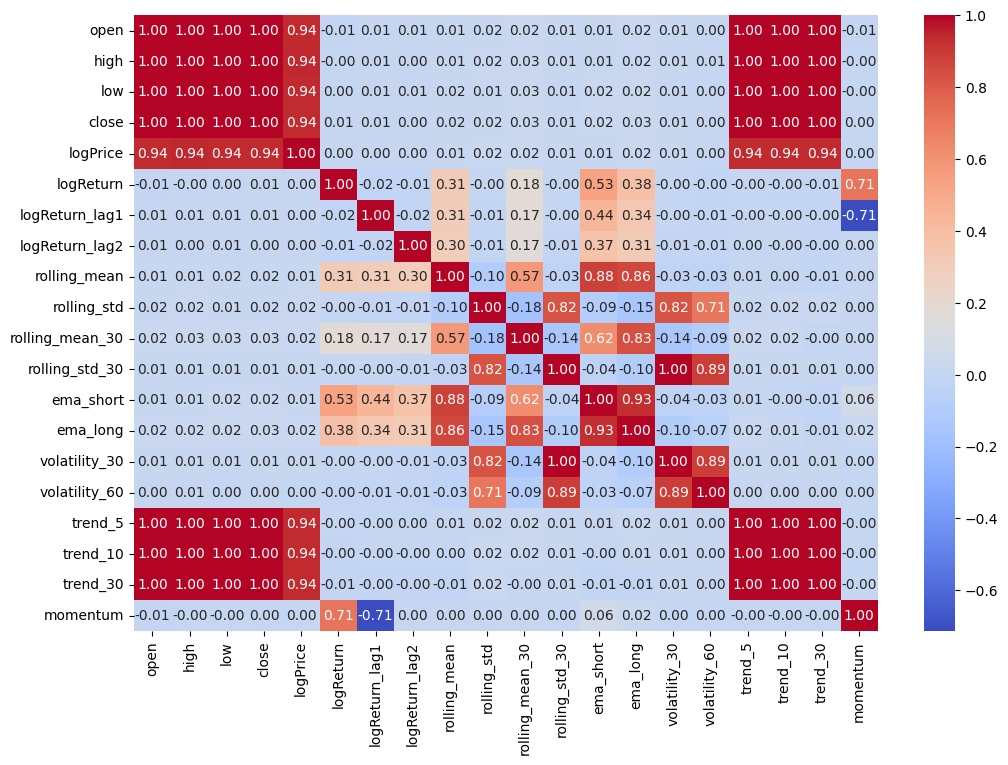

In [74]:

plt.figure(figsize=(12, 8))
sns.heatmap(btc_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

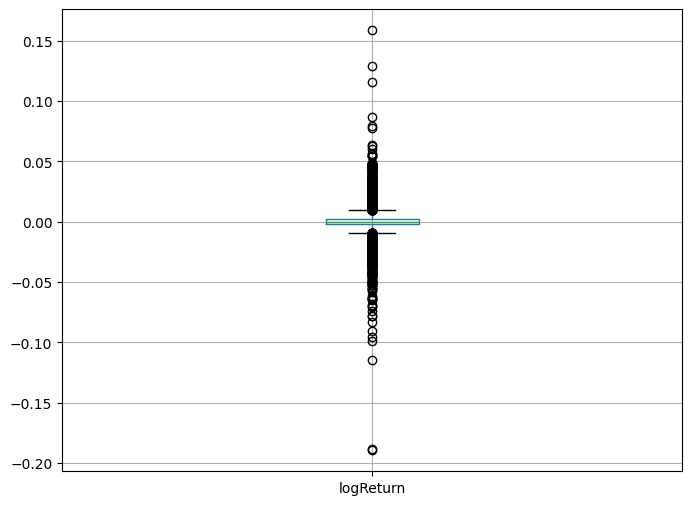

In [75]:
btc_data[['logReturn']].boxplot(figsize=(8, 6))


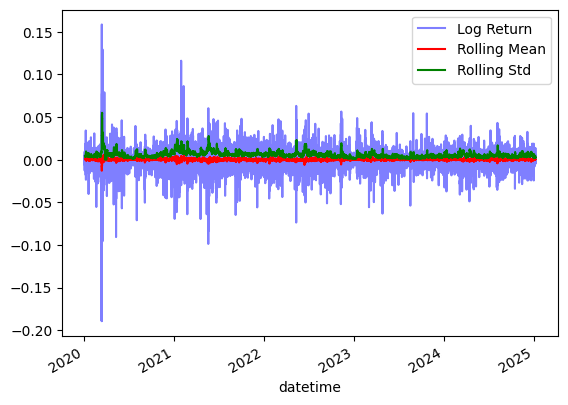

In [76]:
rolling_mean = btc_data['logReturn'].rolling(window=50).mean()
rolling_std = btc_data['logReturn'].rolling(window=50).std()
btc_data['logReturn'].plot(label='Log Return', color='blue', alpha=0.5)
rolling_mean.plot(label='Rolling Mean', color='red')
rolling_std.plot(label='Rolling Std', color='green')
plt.legend()
plt.show()


### Train Test Split

In [77]:
# Define the split ratio
split_ratio = 0.8

# Calculate the split index
split_index = int(len(btc_data) * split_ratio)

# Split the data
train = btc_data.iloc[:split_index]
test = btc_data.iloc[split_index:]

# Print the shapes to confirm
print(f"Training set: {train.shape}")
print(f"Testing set: {test.shape}")


Training set: (35152, 20)
Testing set: (8788, 20)


### Define Target Features

In [78]:
# Define target variable (Y)
target = 'logReturn'

# Define features (X)
features = [
    'logReturn_lag1', 'logReturn_lag2', 
    'rolling_mean', 'rolling_std', 
    'ema_short', 'ema_long', 
    'volatility_30', 'volatility_60',
    'trend_5', 'trend_10', 'trend_30',
    'momentum'
]

# Split into training and testing sets
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Print shapes for confirmation
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (35152, 12), y_train: (35152,)
X_test: (8788, 12), y_test: (8788,)


### Model Building and Evaluation

In [79]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Store results
    results[name] = {
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'R2_train': r2_train,
        'R2_test': r2_test
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Train MSE: {metrics['MSE_train']:.4f}, Test MSE: {metrics['MSE_test']:.4f}")
    print(f"Train R2: {metrics['R2_train']:.4f}, Test R2: {metrics['R2_test']:.4f}")
    print("-" * 30)


Model: Linear Regression
Train MSE: 0.0000, Test MSE: 0.0000
Train R2: 1.0000, Test R2: 1.0000
------------------------------
Model: Random Forest
Train MSE: 0.0000, Test MSE: 0.0000
Train R2: 0.9927, Test R2: 0.9962
------------------------------
Model: Gradient Boosting
Train MSE: 0.0000, Test MSE: 0.0000
Train R2: 0.9736, Test R2: 0.9678
------------------------------


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']])
btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']] = scaled_features

btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']] = scaled_features

C:\Users\idf-v\AppData\Local\Temp\ipykernel_93592\1334977870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']] = scaled_features
C:\Users\idf-v\AppData\Local\Temp\ipykernel_93592\1334977870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']] = scaled_features


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']])
btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']] = scaled_features


C:\Users\idf-v\AppData\Local\Temp\ipykernel_93592\2112273249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data[['open', 'high', 'low', 'close', 'logPrice', 'logReturn']] = scaled_features


In [82]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = btc_data.drop(['logReturn'], axis=1)  # Features excluding the target (logReturn)
y = btc_data['logReturn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature selection :

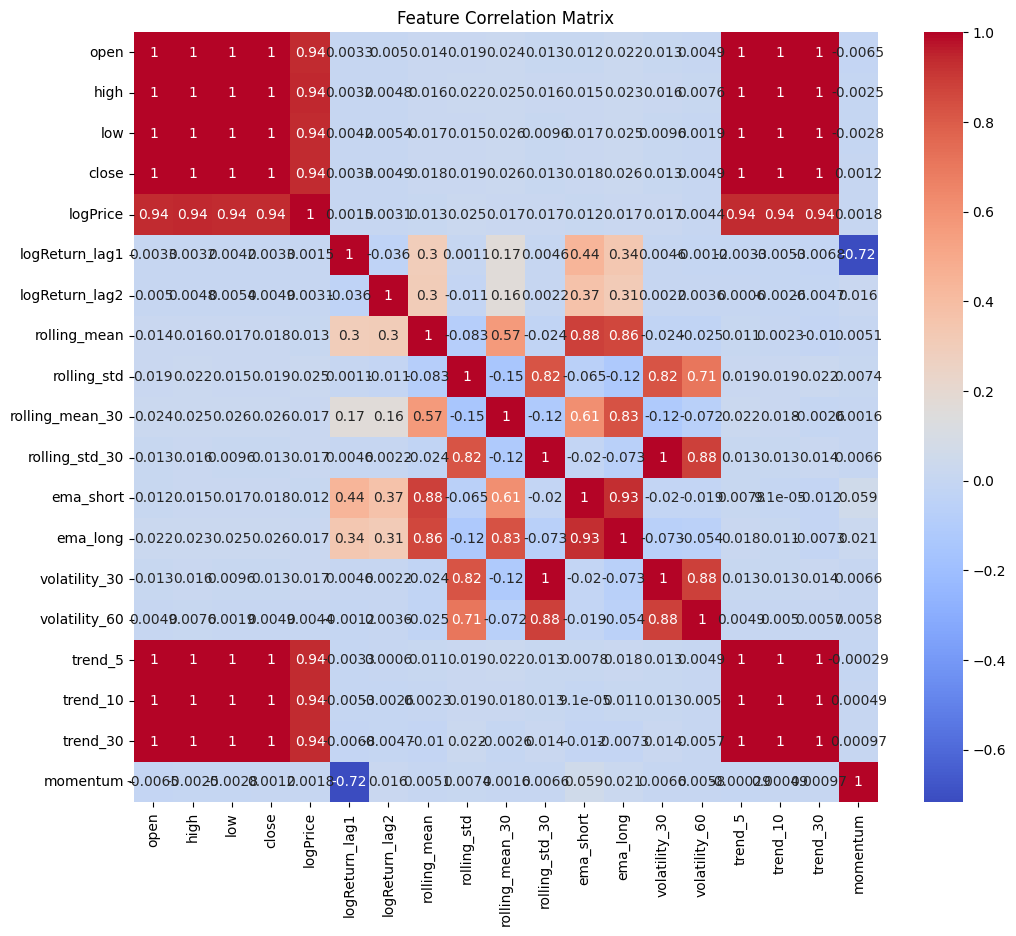

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [84]:
# Set threshold
threshold = 0.7

# Get the columns to keep
# Use absolute values to avoid dropping features that are correlated but not redundant
corr_matrix_abs = corr_matrix.abs()
selected_features = corr_matrix_abs[corr_matrix_abs.max() <= threshold].columns

print(f'Selected features: {selected_features}')


NameError: name 'corr_matrix' is not defined

In [122]:
from sklearn.decomposition import PCA

# Prepare the features for PCA
X = df[selected_features]

# Apply PCA
pca = PCA(n_components=0.95)  # 95% variance explained
X_pca = pca.fit_transform(X)

# Explained variance
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Explained variance ratio: [0.999977]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, df['close'], test_size=0.2, random_state=42)

# Train a RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(f'Feature Importances: \n{feature_importances.sort_values(ascending=False)}')

Feature Importances: 
close    9.999817e-01
low      1.079828e-05
high     7.422634e-06
open     8.927063e-08
dtype: float64


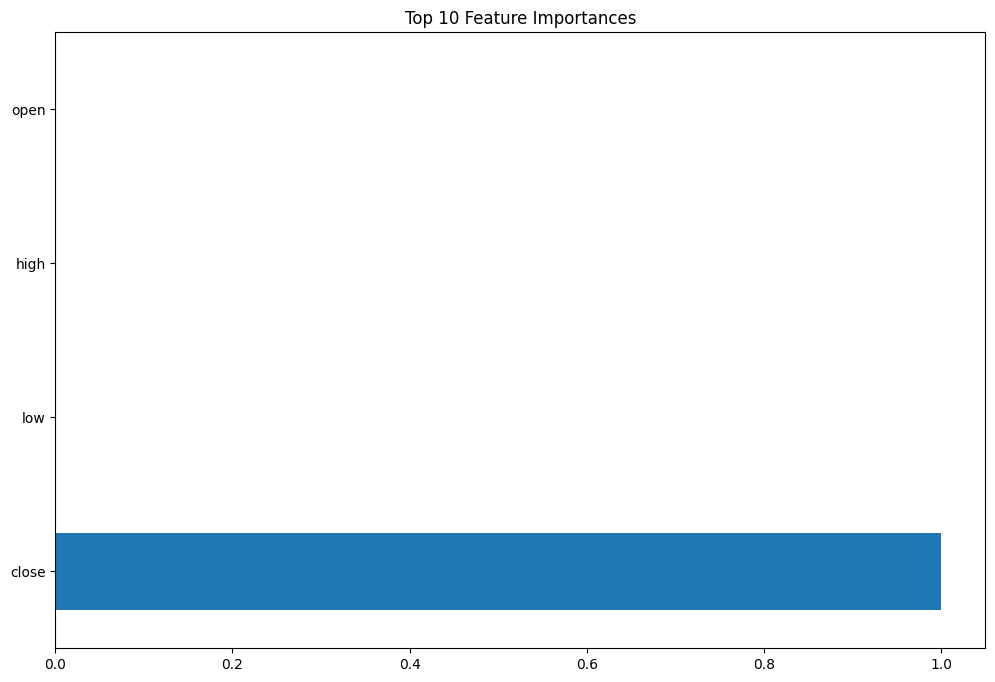

In [ ]:
plt.figure(figsize=(12, 8))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the 'close' feature
df_scaled = df.copy()
df_scaled['close_scaled'] = scaler.fit_transform(df[['close']])

# Display the first few rows of the scaled feature
print(df_scaled.head())


                        open     high      low    close  close_scaled
datetime                                                             
2023-08-17 06:45:00  0.19067  0.19134  0.19038  0.19038     -1.050521
2023-08-17 06:50:00  0.19038  0.19038  0.18868  0.18926     -1.055396
2023-08-17 06:55:00  0.18926  0.19136  0.18926  0.19105     -1.047605
2023-08-17 07:00:00  0.19105  0.19170  0.18996  0.19042     -1.050347
2023-08-17 07:05:00  0.19042  0.19074  0.18971  0.19006     -1.051914


In [126]:

scaler = StandardScaler()
close_scaled = scaler.fit_transform(df[['close']])


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split into train and test sets
train, test = train_test_split(df_scaled, test_size=0.2, shuffle=False)

# Define model and parameters (example for RandomForest)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=10)

# Fit the model
model.fit(train[:-1], train[1:])  # Use lag features if needed

# Prediction and Evaluation
predictions = model.predict(test[:-1])
mse = mean_squared_error(test[1:], predictions)
r2 = r2_score(test[1:], predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2.3188481297423634e-05
R^2 Score: 0.9996412335558874


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train[:-1], train[1:])

print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score:  0.9530493318038978


In [129]:
# # Check the shape of feature_importances
# print(feature_importances.shape)  # It should be (n_features,)

# # Ensure feature_importances is 1D (flatten if necessary)
# feature_importances = feature_importances.flatten()

# # Re-run the plot
# plt.figure(figsize=(10, 6))
# plt.barh(features, feature_importances, align='center')
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance in Predicting Close Prices')
# plt.show()


(4,)


AttributeError: 'Series' object has no attribute 'flatten'

In [130]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    max_depth=15, 
    min_samples_split=5, 
    min_samples_leaf=1, 
    n_estimators=100
)

# Assuming 'train' is your entire training dataset
rf_model.fit(train[['close']], train['close'])


RandomForestRegressor(max_depth=15, min_samples_split=5)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

test_predictions = rf_model.predict(test[['close']])
test_mse = mean_squared_error(test['close'], test_predictions)
test_r2 = r2_score(test['close'], test_predictions)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R^2 Score: {test_r2}")


Test Mean Squared Error: 2.2049449656023154e-09
Test R^2 Score: 0.9999997671110299
